In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

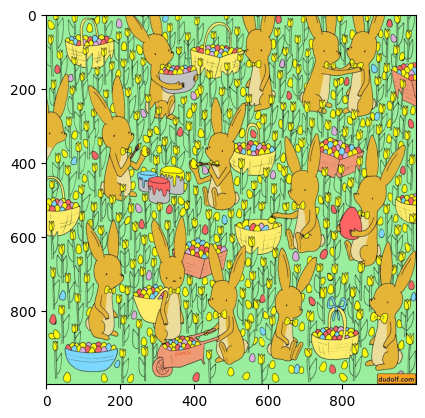

In [91]:
image = cv2.imread('rabbit.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image)

Với bài toán đếm này, ta cần xác định được các điểm đặc trưng của object cần tìm. Cụ thể với bài đếm thỏ này ta có thể thử lấy đôi mắt của chúng. Ta sẽ lấy thử 4 loại mắt xem có thể tìm được toàn bộ hay không. Ngoài ra ta nhận thấy các object trong này khi ta lấy đôi mắt sẽ ít bị ảnh hưởng bới màu sắc do vậy ta có thể lấy trực tiếp ảnh grayscale để so khớp.

In [ ]:
tempates = []
for tempate in os.listdir('rabbit'):
    tempate = cv2.imread(os.path.join('rabbit/', tempate), 0)
    tempates.append(tempate)

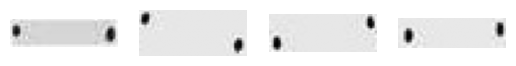

In [93]:
for idx, tempate in enumerate(tempates):
    plt.subplot(1, len(tempates), idx + 1)
    plt.imshow(tempate, cmap='gray')
    plt.axis('off')
plt.show()    

(-0.5, 999.5, 999.5, -0.5)

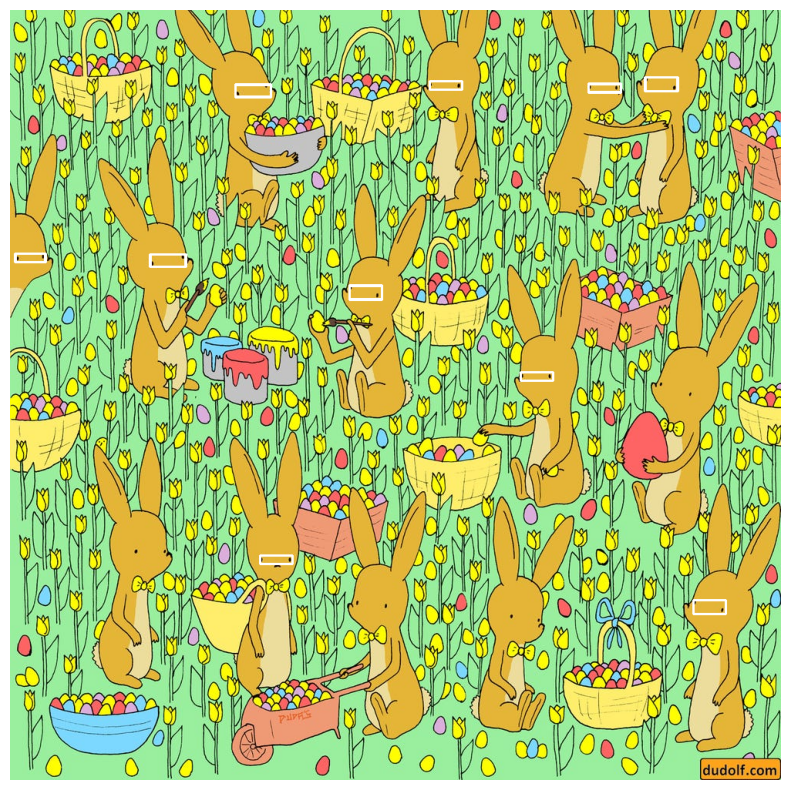

In [99]:
image_cpy = image.copy()
gray_cpy = gray.copy()
for tempate in tempates:
    for scale in np.arange(0.7, 1.2, 0.01):
        resized_tempate = cv2.resize(tempate, None, fx=scale, fy=scale)
        # apply template matching
        result = cv2.matchTemplate(gray_cpy, resized_tempate, cv2.TM_CCOEFF_NORMED)
        # get the locations of matched regions
        loc = np.where(result >= 0.8)
        for pt in zip(*loc[::-1]):
            cv2.rectangle(image_cpy, pt, (pt[0] + tempate.shape[1], pt[1] + tempate.shape[0]), (255, 255, 255), 2)
            cv2.rectangle(gray_cpy, pt, (pt[0] + tempate.shape[1], pt[1] + tempate.shape[0]), (255, 255, 255), 2)
plt.figure(figsize=(20, 10))
plt.imshow(image_cpy)
plt.axis('off')

Ta có thể thấy được việc lấy cạnh có thê thể tìm được tương đối chính xác nhưng vẫn chưa thể tìm thấy hết toàn bộ.